-------------
# The dataset
The first step is to get the dataset

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [32]:
data_root = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/dataset/raw"
data_names = [
    "J20_1MS.csv",
    "J20_02MS.csv",
    "J20_05MS.csv"
]

The dataset containing protoplanetary disk properties and resulting formed planets from this disk properties


There is 3 differents samples of the dataset. Being system with single star of 1, 0.2, and 0.05 solar masses.

In [33]:
print(data_names)

['J20_1MS.csv', 'J20_02MS.csv', 'J20_05MS.csv']


--------------
## Dataset processing
We remove the failed formed planets being, having default value of -1000.

We also sort the dataset by the disk and the planets properties


In [34]:
data_name_index = 0
data_path = os.path.join(data_root, data_names[data_name_index])

In [35]:
from src.data.dataset import CostumDataset
myDataset = CostumDataset(data_path)

myDataset.add_label_total_planets_mass()
myDataset.add_label_planets_count()
myDataset.labels.head()




,System number,Total planets mass (Mearth),planets count
0,1,26.372119,18
1,2,3.912124,17
2,3,199.659274,17
3,4,0.992856,20
4,5,10.671086,18


In [6]:
disk = myDataset.df_disk

In [7]:
disk

,index,System number,metallicity,gas disk (Msun),solid disk (Mearth),life time (yr),luminosity
0,1,1,0.009174,0.031814,101.197780,3103303.80,0.876711
1,20,2,0.017274,0.002482,36.993988,1198925.00,1.704304
2,40,3,0.024667,0.017405,214.425940,2177942.20,1.121847
3,60,4,0.016780,0.001077,25.748476,900505.17,2.095757
4,80,5,0.007195,0.010519,93.134196,1585074.10,1.402273
...,...,...,...,...,...,...,...
19468,389480,19996,0.005336,0.032160,268.492510,1640743.20,1.368416
19469,389500,19997,0.019455,0.002077,29.071904,1154593.20,1.754539
19470,389520,19998,0.011625,0.009790,60.351754,1836044.50,1.263651
19471,389540,19999,0.015472,0.009025,79.297708,1720395.30,1.321734


In [8]:
disk, label = myDataset.__getitem__(3)

In [9]:
disk

index                      60.000000
System number               4.000000
metallicity                 0.016780
gas disk (Msun)             0.001077
solid disk (Mearth)        25.748476
life time (yr)         900505.170000
luminosity                  2.095757
Name: 3, dtype: float64

In [10]:
dataframe = pd.read_csv(data_path)
dataframe
planet_columns = ["Total Mass (Mearth)", "sma (AU)", "GCR (gas to core ratio)", "fraction water", "sma ini", "radius"]
disk_columns = ["metallicity", "gas disk (Msun)", "solid disk (Mearth)", "life time (yr)", "luminosity"]

### disk 

In [30]:
dataframe = pd.read_csv(data_path)
dataframe_gooddata = dataframe.replace(-1000, np.nan).dropna()
dataframe_disk_propriety = dataframe_gooddata.drop_duplicates(subset='System number').drop(columns=planet_columns)
dataframe_disk_propriety.head()

dataframe_disk_propriety.reset_index(drop=True)

,System number,metallicity,gas disk (Msun),solid disk (Mearth),life time (yr),luminosity
0,1,0.009174,0.031814,101.197780,3103303.80,0.876711
1,2,0.017274,0.002482,36.993988,1198925.00,1.704304
2,3,0.024667,0.017405,214.425940,2177942.20,1.121847
3,4,0.016780,0.001077,25.748476,900505.17,2.095757
4,5,0.007195,0.010519,93.134196,1585074.10,1.402273
...,...,...,...,...,...,...
19468,19996,0.005336,0.032160,268.492510,1640743.20,1.368416
19469,19997,0.019455,0.002077,29.071904,1154593.20,1.754539
19470,19998,0.011625,0.009790,60.351754,1836044.50,1.263651
19471,19999,0.015472,0.009025,79.297708,1720395.30,1.321734


In [12]:
def plot_features(columns, df, name):
    for c in columns:
        fig, ax = plt.subplots(1,2, figsize=(8, 3), width_ratios=[2.5, 1])
        
        ax[0].hist(df[c], bins=100)
        ax[0].set(
            title = f"{name} property: {c}",
            xlabel=c,
            ylabel="count"
            )
        lower_quantile = df[c].quantile(0.1)
        upper_quantile = df[c].quantile(0.9)


        data_quantile = df[c][(df[c] >= lower_quantile) & (df[c] <= upper_quantile)]

                
        ax[1].hist(data_quantile, bins=100)
        ax[1].set(
            title = f"zoomed {name} property: {c}",
            xlabel=c,
            ylabel="count"
            )
        
        plt.tight_layout()
        plt.show()

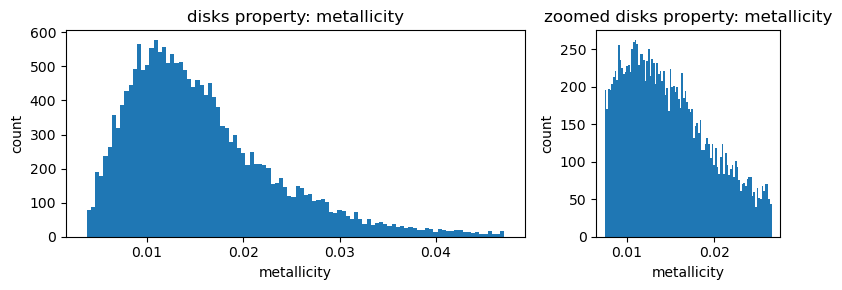

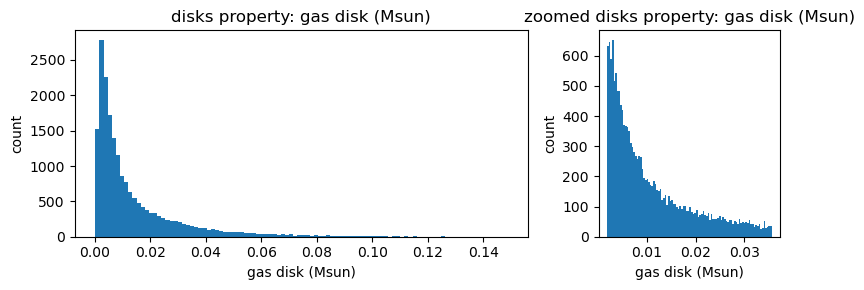

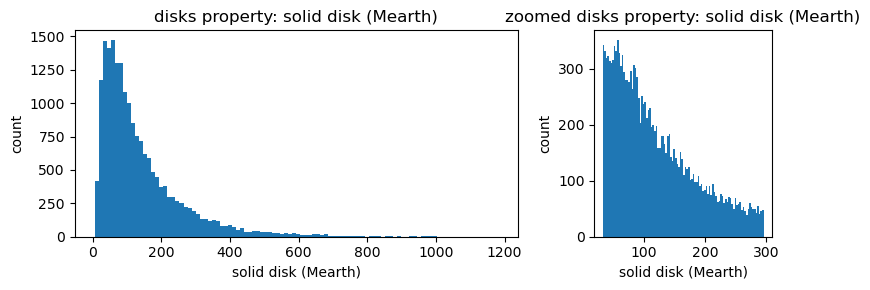

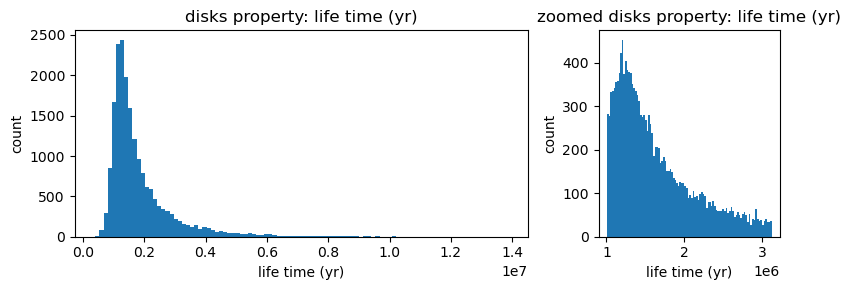

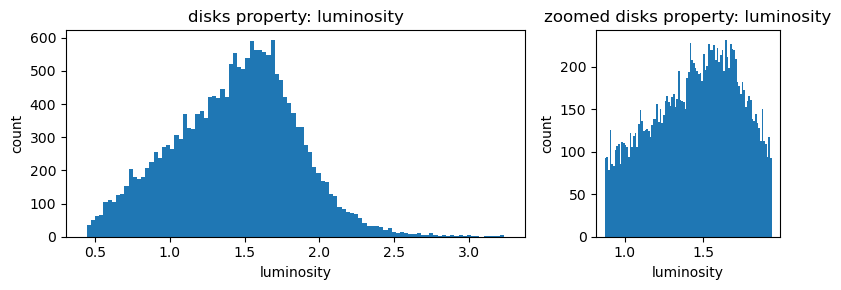

In [13]:
plot_features(disk_columns, dataframe_disk_propriety, "disks")


### planets

In [14]:
dataframe_planets_propriety = dataframe_gooddata.drop(columns=disk_columns)
dataframe_planets_propriety.head()

,System number,Total Mass (Mearth),sma (AU),GCR (gas to core ratio),fraction water,sma ini,radius
1,1,0.486966,8.437974,0.000074,0.008419,8.435899,0.093455
2,1,13.097383,0.494864,1.010360,0.011011,0.491500,0.613140
3,1,1.755973,0.114088,0.000000,0.011497,0.111442,0.101920
4,1,0.137088,0.043359,0.000000,0.006687,0.040965,0.046239
5,1,1.399879,0.219511,0.000000,0.014709,0.214822,0.096246


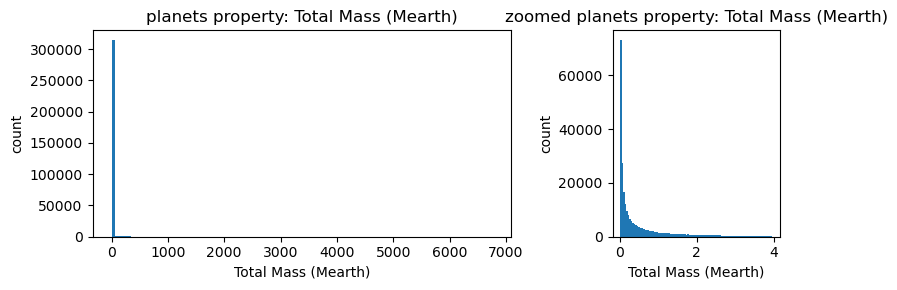

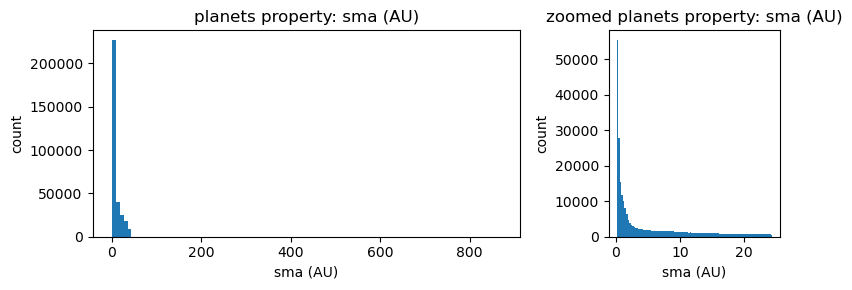

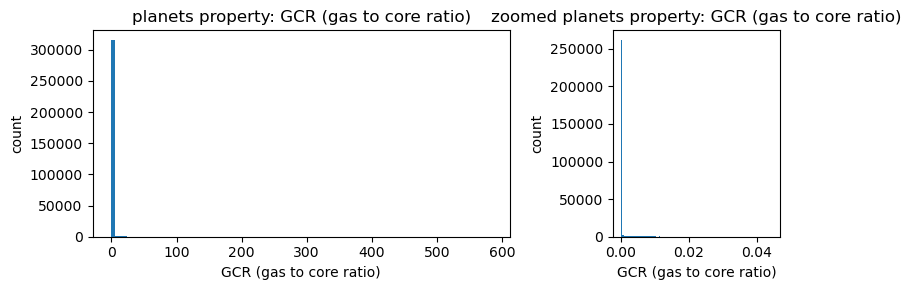

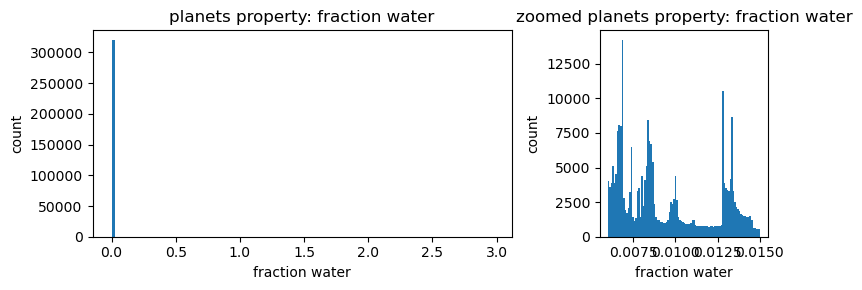

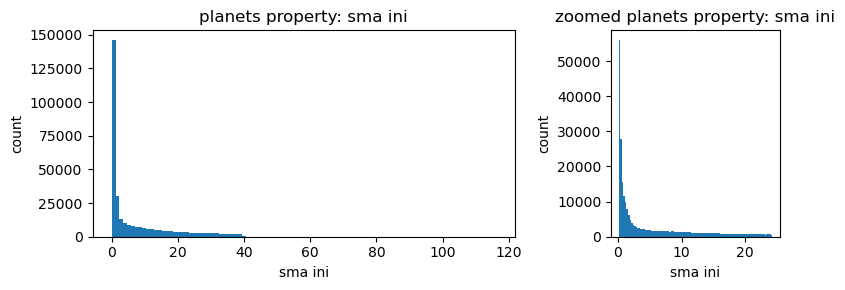

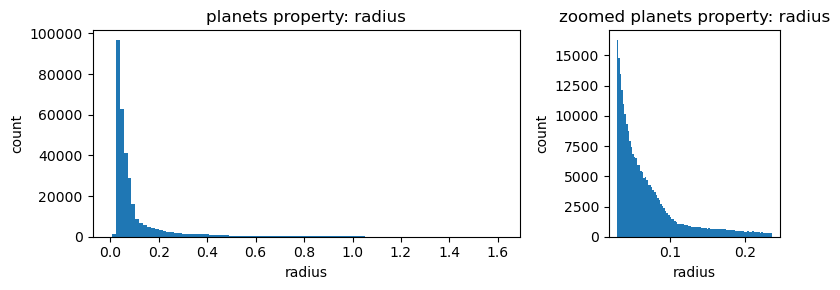

In [15]:
plot_features(planet_columns, dataframe_planets_propriety, "planets")

## Creation of the first simple labels
A first draft of labels will be created:
- the total number of planets in each system
- the number of failed formed planets ?
- the total mass of the planets 

In [16]:
dataframe_planets_propriety.head()

,System number,Total Mass (Mearth),sma (AU),GCR (gas to core ratio),fraction water,sma ini,radius
1,1,0.486966,8.437974,0.000074,0.008419,8.435899,0.093455
2,1,13.097383,0.494864,1.010360,0.011011,0.491500,0.613140
3,1,1.755973,0.114088,0.000000,0.011497,0.111442,0.101920
4,1,0.137088,0.043359,0.000000,0.006687,0.040965,0.046239
5,1,1.399879,0.219511,0.000000,0.014709,0.214822,0.096246


In [17]:
def get_planet_counts(df:pd.DataFrame) -> pd.DataFrame:
    """Return the number of planets in each system.

    Parameters
    ----------
    df : pd.DataFrame
        the planets dataframe

    Returns
    -------
    pd.DataFrame
        return the number of planets in each system.
    """
    
    planet_counts = df.groupby("System number").size().reset_index(name="counts")
    
    return planet_counts


planet_counts = get_planet_counts(dataframe_gooddata)
planet_counts.head()

,System number,counts
0,1,18
1,2,17
2,3,17
3,4,20
4,5,18


In [18]:
planet_counts = dataframe_planets_propriety['System number'].value_counts().sort_index()
planet_counts.head()

System number
1    18
2    17
3    17
4    20
5    18
Name: count, dtype: int64

In [19]:
total_mass_sum = dataframe_planets_propriety.groupby('System number')['Total Mass (Mearth)'].sum()
print(total_mass_sum)

System number
1         26.372119
2          3.912124
3        199.659274
4          0.992856
5         10.671086
            ...    
19996    237.162848
19997      1.005541
19998      8.170006
19999     14.160703
20000      5.803011
Name: Total Mass (Mearth), Length: 19473, dtype: float64


In [20]:
data = pd.DataFrame(dataframe_disk_propriety)
data = data.join(planet_counts, on='System number')
data = data.join(total_mass_sum, on='System number')
print(dataframe_disk_propriety.shape, planet_counts.shape, total_mass_sum.shape, data.shape)

(19473, 6) (19473,) (19473,) (19473, 8)


In [21]:
data.head()

,System number,metallicity,gas disk (Msun),solid disk (Mearth),life time (yr),luminosity,count,Total Mass (Mearth)
1,1,0.009174,0.031814,101.197780,3103303.80,0.876711,18,26.372119
20,2,0.017274,0.002482,36.993988,1198925.00,1.704304,17,3.912124
40,3,0.024667,0.017405,214.425940,2177942.20,1.121847,17,199.659274
60,4,0.016780,0.001077,25.748476,900505.17,2.095757,20,0.992856
80,5,0.007195,0.010519,93.134196,1585074.10,1.402273,18,10.671086


In [22]:
# Shuffle the dataframe
data = data.drop(labels="System number", axis=1)
data.head()

,metallicity,gas disk (Msun),solid disk (Mearth),life time (yr),luminosity,count,Total Mass (Mearth)
1,0.009174,0.031814,101.197780,3103303.80,0.876711,18,26.372119
20,0.017274,0.002482,36.993988,1198925.00,1.704304,17,3.912124
40,0.024667,0.017405,214.425940,2177942.20,1.121847,17,199.659274
60,0.016780,0.001077,25.748476,900505.17,2.095757,20,0.992856
80,0.007195,0.010519,93.134196,1585074.10,1.402273,18,10.671086


KeyboardInterrupt: 

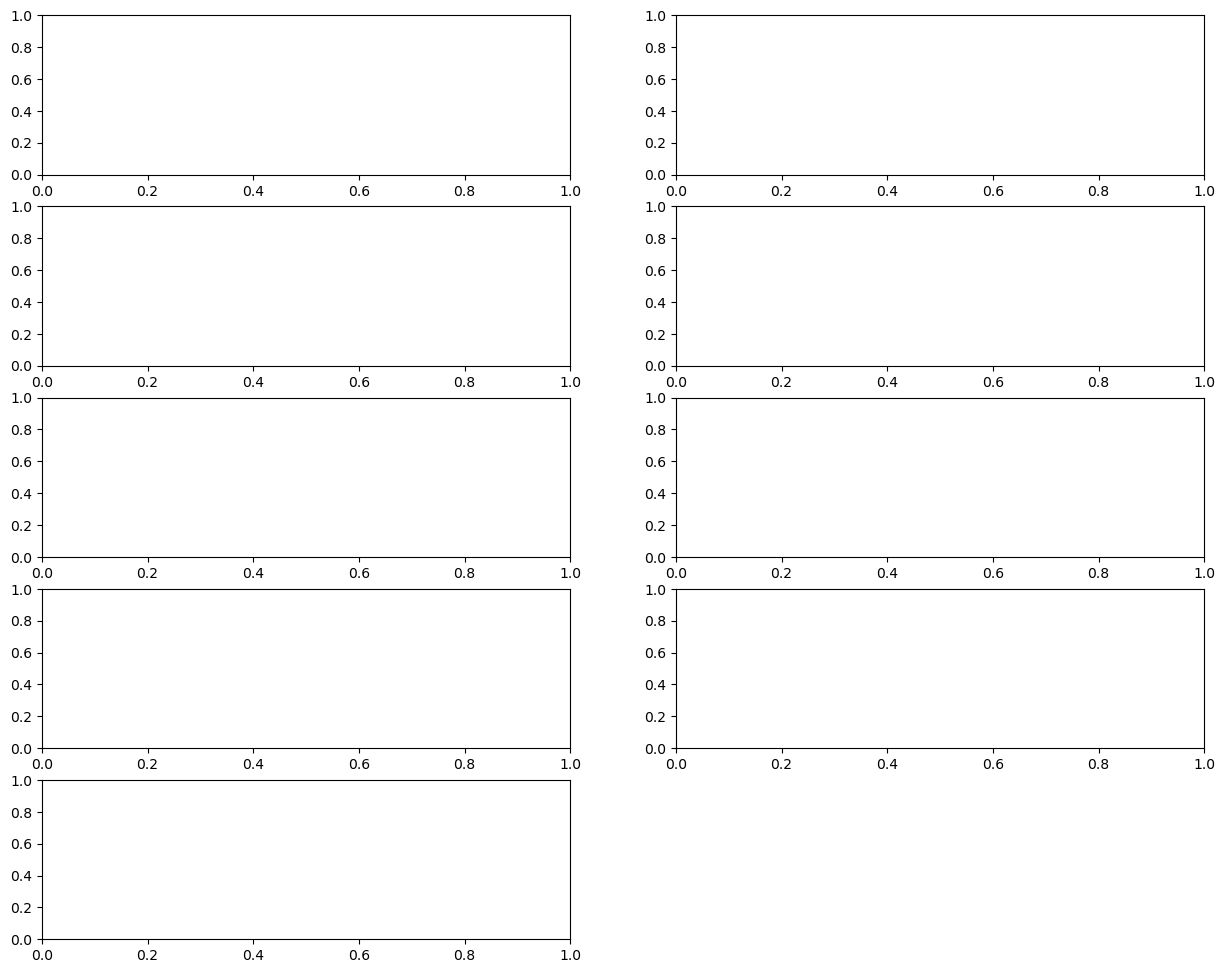

In [23]:
# we can look for correlation in the data and the label already

fig, ax = plt.subplots(len(disk_columns), 2, figsize=(15, 12))

for i_dc, dc in enumerate(disk_columns):
    
    ax[i_dc, 0].set(
        ylabel=dc
    )
    ax[i_dc, 0].scatter(data["count"], data[dc], s=1)
    ax[i_dc, 1].scatter(data["Total Mass (Mearth)"], data[dc], s=1)

ax[-1, 0].set(
    xlabel="count"
)
ax[-1, 1].set(
    xlabel="Total Mass (Mearth)"
)

plt.show()
    

In [ ]:
test = data["metallicity"].values[0]
print(test)

0.009174257


In [ ]:
#data = data.drop(columns=["count"])

data_np = data.sample(frac=1).to_numpy()

In [ ]:
# sanity check of shuffling
print(data[data["metallicity"] == test])
print(data_np[np.argwhere(data_np[:, 0] == test)])

        metallicity  gas disk (Msun)  solid disk (Mearth)  life time (yr)  \
1          0.009174         0.031814            101.19778       3103303.8   
290081     0.009174         0.035145            109.49106       3218409.3   

        luminosity  count  Total Mass (Mearth)  
1         0.876711     18            26.372119  
290081    0.854720     15            31.142719  
[[[9.17425700e-03 3.18138100e-02 1.01197780e+02 3.10330380e+06
   8.76711350e-01 1.80000000e+01 2.63721194e+01]]

 [[9.17425700e-03 3.51453430e-02 1.09491060e+02 3.21840930e+06
   8.54720450e-01 1.50000000e+01 3.11427193e+01]]]


In [ ]:
# separate features and labels
features, labels = data_np[:, :5], data_np[:, 5:]
print(features.shape, labels.shape)

(19473, 5) (19473, 2)


In [ ]:
# separate training and testing data
frac_train = int(0.8*features.shape[0])
train_features, train_labels = features[:frac_train], labels[:frac_train]
test_features, test_labels = features[frac_train:], labels[frac_train:]
print(data_np.shape, train_features.shape + test_features.shape, train_labels.shape + test_labels.shape)

(19473, 7) (15578, 5, 3895, 5) (15578, 2, 3895, 2)


In [ ]:
train_features_mean = np.mean(train_features, axis=0)
train_features_std = np.std(train_features, axis=0)
train_labels_mean = np.mean(train_labels, axis=0)
train_labels_std = np.std(train_labels, axis=0) 
print(train_features_mean)
print(train_features_std)

[1.56948235e-02 1.43472134e-02 1.40375850e+02 1.85604001e+06
 1.44159507e+00]
[7.72406177e-03 1.73878310e-02 1.25802357e+02 1.16291071e+06
 4.13178753e-01]


In [ ]:
normalized_train_features = (train_features - train_features_mean) / train_features_std
normalized_test_features = (test_features - train_features_mean) / train_features_std

normalized_train_labels = train_labels#(train_labels - train_labels_mean) / train_labels_std
normalized_test_labels = test_labels#(test_labels - train_labels_mean) / train_labels_std

training_set = np.append(normalized_train_features, normalized_train_labels, axis=1)
testing_set = np.append(normalized_test_features, normalized_test_labels, axis=1)

In [ ]:
print(normalized_train_features.mean(axis=0), normalized_train_features.std(axis=0))
print(normalized_test_features.mean(axis=0), normalized_test_features.std(axis=0))

print(normalized_train_labels.mean(axis=0), normalized_train_labels.std(axis=0))
print(normalized_test_labels.mean(axis=0), normalized_test_labels.std(axis=0))


[-1.19503272e-16 -1.82447743e-18  7.16107392e-17 -4.92608907e-17
 -2.23498485e-17] [1. 1. 1. 1. 1.]
[ 0.02282783 -0.01649552  0.00085555 -0.00249216 -0.0101213 ] [1.01152233 0.95686984 0.99096162 0.97272717 0.98993994]
[ 16.44299653 196.34530226] [  4.43582997 609.44471977]
[ 16.40513479 188.21243858] [  4.49431812 584.33912866]


# The model
The model will be first a typical neural network

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [ ]:
input_dim = 5
output_dim = 2
hidden_dim = 25
class NeuralNetv0(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetv0, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer_3 = nn.Linear(hidden_dim, hidden_dim)
        self.layer_4 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.relu(self.layer_2(x))
        x = torch.nn.functional.relu(self.layer_3(x))

        x = self.layer_4(x)

        return x
    
model = NeuralNetv0(input_dim, hidden_dim, output_dim)

In [ ]:
learning_rate = 0.01
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# The training

In [ ]:
batch_size = 64

training_dataloader = DataLoader(training_set, batch_size=batch_size, shuffle=True)
testing_dataloader = DataLoader(testing_set, batch_size=batch_size, shuffle=True)
n_epochs = 500
train_loss_values = np.empty(n_epochs)
test_loss_values = np.empty(n_epochs)


for i_epoch, epoch in enumerate(range(n_epochs)):
    running_loss = 0
    model.train(True)
    for i_data, data in enumerate(training_dataloader):
        inputs, labels = data[:, :5].float(), data[:, 5:].float()
        
    
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()#/batch_size pytorch return the mean by default
        loss.backward()
        optimizer.step()
        
    train_loss_values[i_epoch] = running_loss/len(training_dataloader)
    
    model.eval()
    running_loss = 0
    
    with torch.no_grad():
        for i_data, data in enumerate(testing_dataloader):
            inputs, labels = data[:, :5].float(), data[:, 5:].float()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            running_loss += loss.item()/batch_size
        test_loss_values[i_epoch] = running_loss/len(testing_dataloader)
            
        
            
    if i_epoch % (n_epochs//10) == 0:
        print(f"Epoch {epoch} loss: {train_loss_values[i_epoch]}")

Epoch 0 loss: 86421.91714227395
Epoch 50 loss: 48402.570943363375


KeyboardInterrupt: 

In [ ]:
fig ,ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(np.arange(n_epochs), train_loss_values, label="train loss")
ax.plot(np.arange(n_epochs), test_loss_values, label="test loss")
ax.set(
    xlabel="epoch",
    ylabel="loss"
)

fig.legend()
plt.show()


## misc

In [ ]:
print(dataframe_disk_propriety.shape, dataframe_planets_propriety.shape, total_mass_sum.shape, planet_counts.shape)

In [ ]:
import pandas as pd

grouped_df = dataframe_gooddata.groupby("System number")

index = pd.MultiIndex.from_frame(dataframe_gooddata)

df_test = dataframe_gooddata.set_index(index)

In [ ]:
df_test.groupby("System number").shape

In [ ]:
print(grouped_df)

ModuleNotFoundError: No module named 'data'